In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv(r"C:\Users\tonyd\OneDrive\바탕 화면\4-2\딥러닝 응용\data\DSA_features.csv")

In [3]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [4]:
np.random.seed(33)

In [5]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [6]:
# 'lyingBack'과 'lyingRigh'을 'lying'으로 변환
df['activity'] = df['activity'].replace({'lyingBack': 'lying', 'lyingRigh': 'lying'})

In [7]:
# 필터링: 'lying'과 'standing'만 남김
df_filtered = df[df['activity'].isin(['lying', 'standing'])]

In [8]:
df_filtered['activity'].value_counts()

activity
lying       960
standing    480
Name: count, dtype: int64

In [9]:
df_filtered = df_filtered.drop(columns=['people'])

In [10]:
df_filtered

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
480,8.416815,8.5783,8.3103,0.002356,0.048537,0.867785,0.571528,0.73677,0.35819,0.004036,...,1.278649e-06,0.001131,0.243260,0.644246,0.64700,0.64109,0.000002,0.001313,-0.184083,standing
481,8.439497,8.6153,8.1908,0.005754,0.075855,0.092156,0.499881,0.63267,0.32807,0.004515,...,2.816324e-06,0.001678,0.391596,0.643432,0.64789,0.63942,0.000003,0.001805,0.239917,standing
482,8.442786,8.5184,8.3690,0.000786,0.028033,0.096127,0.429967,0.59482,0.32835,0.001260,...,1.760422e-06,0.001327,0.753549,0.643036,0.64646,0.64019,0.000002,0.001447,0.178525,standing
483,8.444243,8.5480,8.3692,0.001558,0.039470,0.361301,0.414673,0.49073,0.33563,0.000867,...,1.218089e-05,0.003490,0.178568,0.643370,0.64657,0.64004,0.000003,0.001771,0.080492,standing
484,8.347373,8.4138,8.2791,0.000774,0.027822,0.018596,0.441606,0.52153,0.37246,0.001067,...,8.834185e-07,0.000940,-0.237978,0.643874,0.64611,0.64063,0.000001,0.001219,-0.291443,standing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.34240,-9.42070,0.000242,...,9.195642e-05,0.009589,0.401254,-0.410987,-0.38221,-0.44605,0.000099,0.009967,-0.597598,lying
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.36570,-9.43560,0.000156,...,7.375030e-05,0.008588,0.147180,-0.411248,-0.36581,-0.43676,0.000087,0.009306,1.021454,lying
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.36280,-9.43130,0.000214,...,3.380089e-05,0.005814,0.032341,-0.409787,-0.37926,-0.43431,0.000073,0.008520,0.431012,lying
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.36490,-9.45390,0.000257,...,9.044032e-05,0.009510,0.409508,-0.409101,-0.36074,-0.44087,0.000113,0.010620,1.368666,lying


In [11]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# activity 열을 Label Encoding
df_filtered['activity'] = label_encoder.fit_transform(df_filtered['activity'])

# 변환된 activity 값 확인
print(df_filtered['activity'].value_counts())

activity
0    960
1    480
Name: count, dtype: int64


In [12]:
encoded_classes = label_encoder.classes_

# 원래 클래스와 인코딩된 값 간의 매핑 출력
mapping = {original: encoded for original, encoded in zip(encoded_classes, range(len(encoded_classes)))}
print("Mapping of original values to encoded values:")
print(mapping)

Mapping of original values to encoded values:
{'lying': 0, 'standing': 1}


In [13]:
# 데이터 확인
print(df_filtered['activity'].value_counts())

activity
0    960
1    480
Name: count, dtype: int64


In [14]:
num = df_filtered.shape[0]  # df_filtered의 행 수

In [15]:
# 원본 DataFrame을 복사합니다.
No_noise_df = df_filtered.copy()

# 노이즈 인자 설정
noise_factor = 0.2

# activity 열을 제외한 부분에만 노이즈를 추가합니다.
noisy_data = df_filtered.drop(columns=['activity']) + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=df_filtered.drop(columns=['activity']).shape
)

# 노이즈가 추가된 데이터와 activity 열을 병합합니다.
noisy_data['activity'] = df_filtered['activity']

# 결과를 확인합니다.
noisy_data.head()


,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
480,8.353044,8.257704,8.003256,-0.111724,0.005192,0.918760,0.541638,1.138927,0.338833,0.088477,...,-0.125348,-0.242726,0.185132,0.694799,0.602994,0.707033,-0.065108,-0.106320,-0.236432,1
481,8.236216,8.483867,8.118716,-0.363748,0.404640,-0.315790,0.449142,0.722120,0.346114,0.231959,...,0.024278,-0.062196,0.145555,0.534498,0.660959,0.545433,-0.180565,-0.031741,0.176585,1
482,8.256691,8.624597,8.492387,0.076697,-0.229367,0.342884,0.624812,0.308894,0.284364,0.237775,...,0.020123,-0.088814,0.954066,0.403823,0.648183,0.641690,0.201134,0.200746,0.326768,1
483,8.253308,8.256842,8.457236,-0.037783,0.206953,0.427992,0.356985,0.447917,0.409662,-0.106146,...,-0.026014,0.152309,-0.024290,0.601534,0.766667,0.596627,-0.262316,0.155244,-0.005358,1
484,8.460179,8.518629,8.177668,0.168122,0.096495,0.371721,0.033519,0.390713,0.577061,-0.125095,...,-0.052940,0.302516,-0.216201,0.390278,0.580503,0.834180,0.135794,0.492096,-0.511423,1


In [16]:
# Noisy Data

X_train, X_test = train_test_split(noisy_data, test_size=0.1, random_state=42)
X_train, X_valid = train_test_split(X_train, test_size=0.2, random_state=42)

X_train.shape, X_test.shape



((1036, 271), (144, 271))

In [17]:
# Validation data without noisy

X_train2, X_test2 = train_test_split(No_noise_df, test_size=0.1, random_state=42)
X_train2, X_valid2 = train_test_split(X_train2, test_size=0.2, random_state=42)

X_train2.shape, X_test2.shape

y_test = X_test2['activity']

In [18]:
X_train.shape

(1036, 271)

In [19]:
X_valid = X_valid[X_valid['activity'] == 0]
X_valid2 = X_valid2[X_valid2['activity'] == 0]
X_train = X_train[X_train['activity'] == 0]
X_train2 = X_train2[X_train2['activity'] == 0]

#AutoEncoder symmetrical

In [20]:
# 오토인코더 모델(대칭형)

input_dim = X_test2.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [21]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train2, X_train2, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_data=(X_valid2, X_valid2))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - loss: 5.6928 - val_loss: 5.7738
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.7150 - val_loss: 5.7680
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5.7498 - val_loss: 5.7629
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5.6974 - val_loss: 5.7570
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5.6998 - val_loss: 5.7499
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.6804 - val_loss: 5.7412
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.7105 - val_loss: 5.7303
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 5.6455 - val_loss: 5.7167
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5.6496 - val_loss: 5.6997
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.6274 - val_loss: 5.6787
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.6572 - val_loss: 5.6534
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.6265 - val_loss: 5.6242


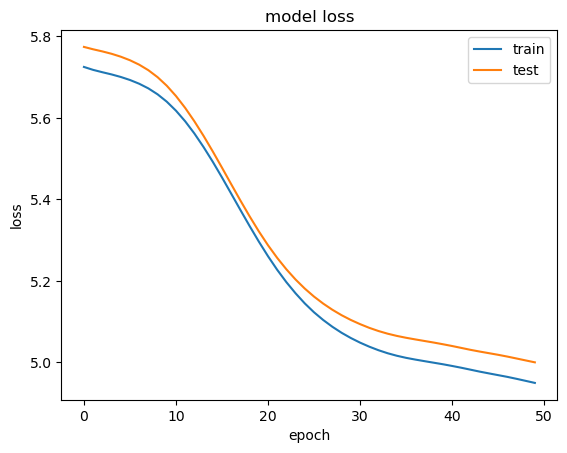

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [23]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test2)
mse = np.mean(np.power(X_test2 - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


,reconstruction_error,true_class
count,144.000000,144.000000
mean,5.008172,0.361111
std,0.267460,0.481999
min,4.505038,0.000000
25%,4.761165,0.000000
50%,5.095435,0.000000
75%,5.198551,1.000000
max,5.772190,1.000000


In [24]:
print("Length of mse:", len(mse))
print("Length of X_test2:", len(X_test2.values.flatten()))


Length of mse: 144
Length of X_test2: 39024


In [25]:
error_df.head()

,reconstruction_error,true_class
648,5.373060,1
1085,5.001918,0
1028,5.297571,0
545,5.194648,1
1108,4.984672,0


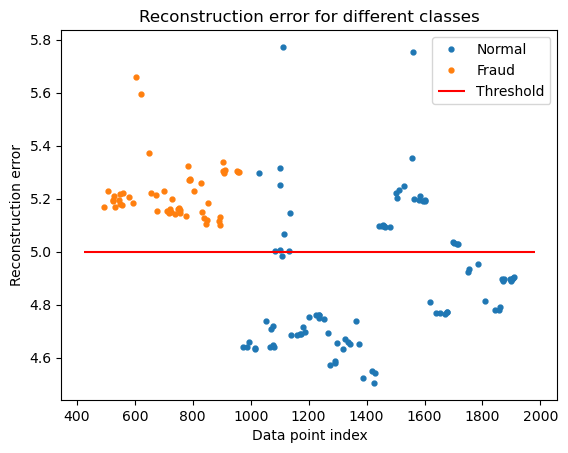

In [26]:
threshold = 5.0

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [27]:
LABELS = ["Normal", "Fraud"]

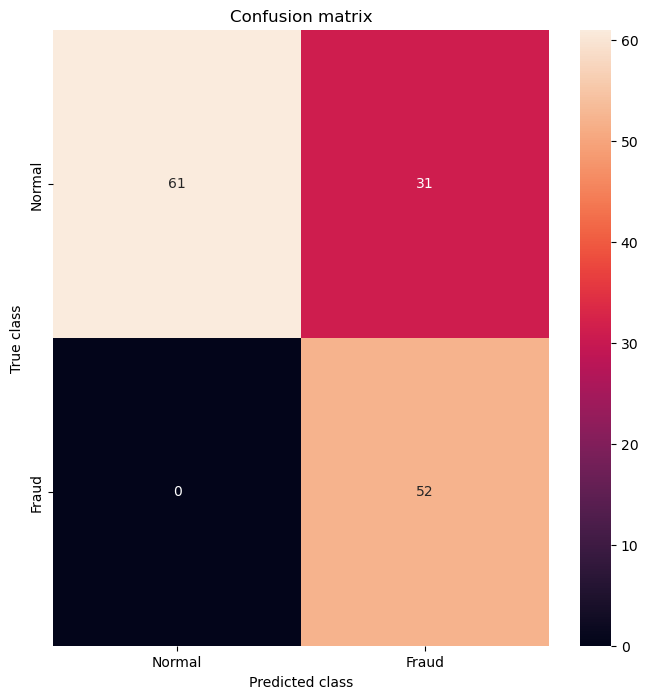

              precision    recall  f1-score   support

           0       1.00      0.66      0.80        92
           1       0.63      1.00      0.77        52

    accuracy                           0.78       144
   macro avg       0.81      0.83      0.78       144
weighted avg       0.87      0.78      0.79       144



In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [0 if e < threshold else 1 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

#AutoEncoder asymmetrical

In [29]:
# 오토인코더 모델 (비대칭형)
input_layer_asym = Input(shape=(input_dim,))
encoded_asym = Dense(encoding_dim, activation='relu')(input_layer_asym)
encoded_asym = Dense(int(encoding_dim / 2), activation='relu')(encoded_asym)
encoded_asym = Dense(4, activation='relu')(encoded_asym)  # 비대칭: 더 작은 인코딩 차원 추가

decoded_asym = Dense(8, activation='relu')(encoded_asym)  # 비대칭: 더 큰 디코딩 차원 추가
decoded_asym = Dense(int(encoding_dim / 2), activation='relu')(decoded_asym)
decoded_asym = Dense(input_dim, activation='sigmoid')(decoded_asym)

autoencoder_asym = Model(inputs=input_layer_asym, outputs=decoded_asym)
autoencoder_asym.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


# 모델 요약 출력
autoencoder_asym.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 271)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 14)             │         3,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │            63 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 271)            │         2,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,216 (24.28 KB)

 Trainable params: 6,216 (24.28 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# 3. 모델 학습
history = autoencoder_asym.fit(X_train2, X_train2, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_data=(X_valid2, X_valid2))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - loss: 5.7069 - val_loss: 5.7688
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5.7059 - val_loss: 5.7638
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 5.6813 - val_loss: 5.7576
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.7379 - val_loss: 5.7495
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5.7211 - val_loss: 5.7391
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5.6539 - val_loss: 5.7262
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 5.6619 - val_loss: 5.7104
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 5.6208 - val_loss: 5.6909
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.5999 - val_loss: 5.6676
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.5743 - val_loss: 5.6408
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.6175 - val_loss: 5.6100
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 5.5187 - val_loss: 5.5750


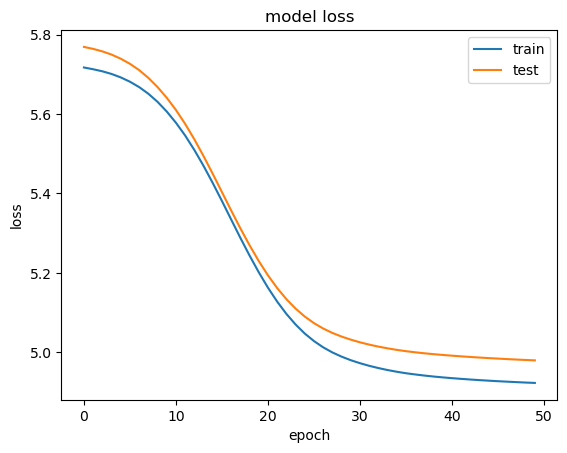

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [32]:
print("Length of mse:", len(mse))
print("Length of X_test2:", len(X_test2.values.flatten()))

Length of mse: 144
Length of X_test2: 39024


In [33]:
# X_test2 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder_asym.predict(X_test2)
mse = np.mean(np.power(X_test2 - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


,reconstruction_error,true_class
count,144.000000,144.000000
mean,5.019863,0.361111
std,0.307113,0.481999
min,4.553497,0.000000
25%,4.683309,0.000000
50%,5.035327,0.000000
75%,5.283079,1.000000
max,5.730665,1.000000


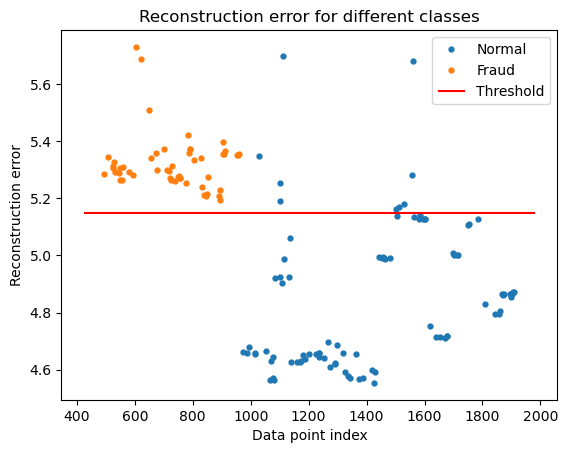

In [34]:
threshold = 5.15
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()

plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

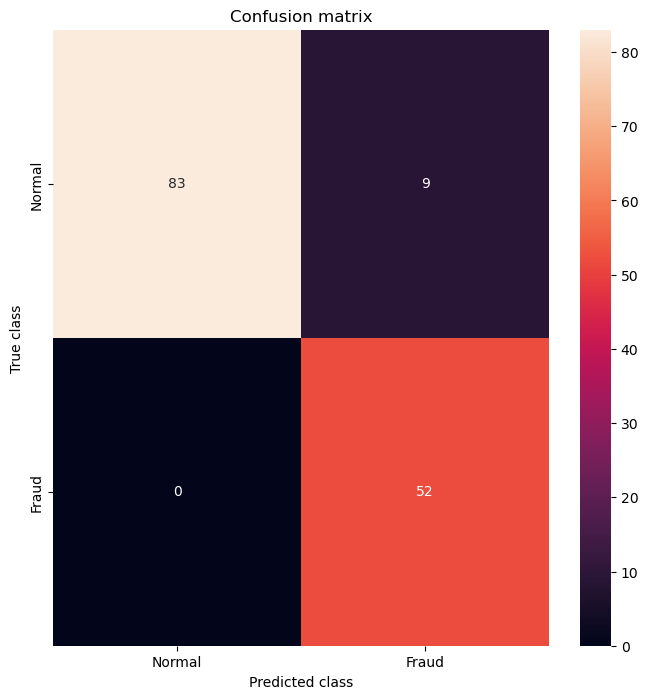

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        92
           1       0.85      1.00      0.92        52

    accuracy                           0.94       144
   macro avg       0.93      0.95      0.93       144
weighted avg       0.95      0.94      0.94       144



In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [0 if e < threshold else 1 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

#Denoising AutoEncoder

In [36]:
import numpy as np

import matplotlib.pyplot as plt

from keras.layers import Input, Dense

from keras.models import Model



In [37]:
autoencoder_de = Model(input_layer, decoded)

autoencoder_de.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
# 모델 학습

autoencoder_de.fit(X_train, X_train2, epochs=100, batch_size=16, shuffle=True, verbose=1)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.9554
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8929 
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8950 
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8297
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9178
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0510
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8222
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8264
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8715
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.0573
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8411
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8659
Epoch 13/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0006
Epoch 14/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8028
Epoch 15/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8458
Ep

In [39]:
# validation dataset은 상관없음

# 노이즈 제거 후 데이터 예측

denoised_data= autoencoder_de.predict(X_test)



1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000285B39BF740> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


#denoised data 오토인코더 사용

In [56]:
predictions = autoencoder.predict(denoised_data)
mse = np.mean(np.power(denoised_data - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,reconstruction_error,true_class
count,144.000000,144.000000
mean,0.017936,0.361111
std,0.005992,0.481999
min,0.010720,0.000000
25%,0.012719,0.000000
50%,0.017181,0.000000
75%,0.021063,1.000000
max,0.032316,1.000000


In [57]:
error_df.head()

,reconstruction_error,true_class
648,0.019986,1
1085,0.020381,0
1028,0.029155,0
545,0.011344,1
1108,0.020760,0


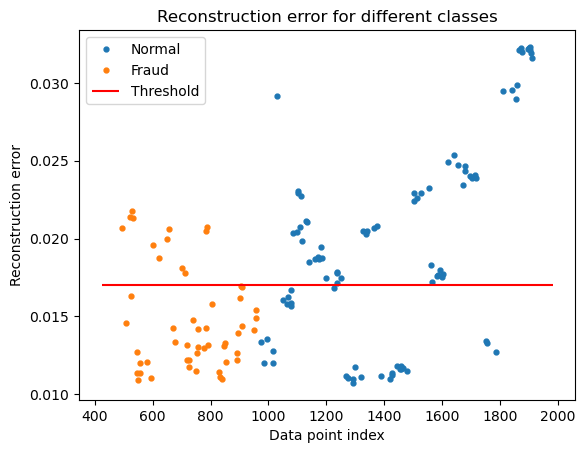

In [58]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 0.017

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

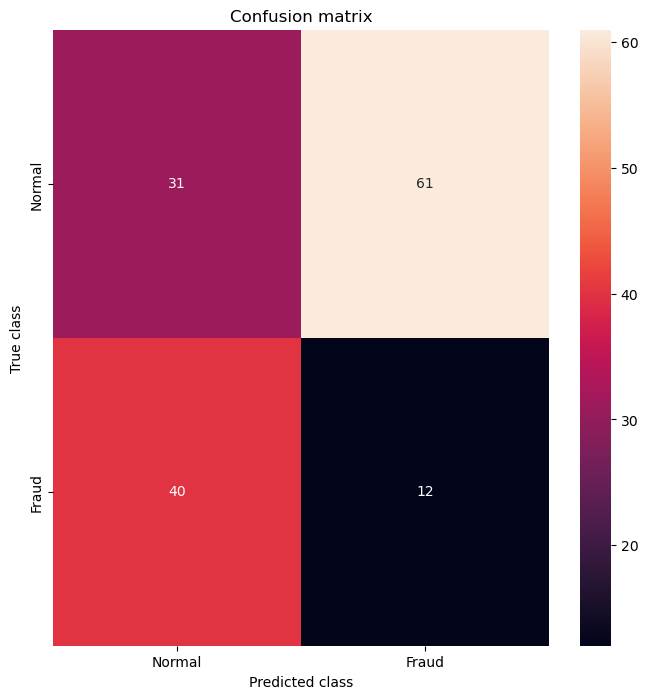

              precision    recall  f1-score   support

           0       0.44      0.34      0.38        92
           1       0.16      0.23      0.19        52

    accuracy                           0.30       144
   macro avg       0.30      0.28      0.29       144
weighted avg       0.34      0.30      0.31       144



In [59]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [0 if e < threshold else 1 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

In [60]:
predictions = autoencoder_asym.predict(denoised_data)
mse = np.mean(np.power(denoised_data - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,reconstruction_error,true_class
count,144.000000,144.000000
mean,0.094781,0.361111
std,0.013347,0.481999
min,0.071317,0.000000
25%,0.087139,0.000000
50%,0.094422,0.000000
75%,0.104930,1.000000
max,0.137408,1.000000


In [61]:
error_df.head()

,reconstruction_error,true_class
648,0.115158,1
1085,0.110368,0
1028,0.137408,0
545,0.097483,1
1108,0.112093,0


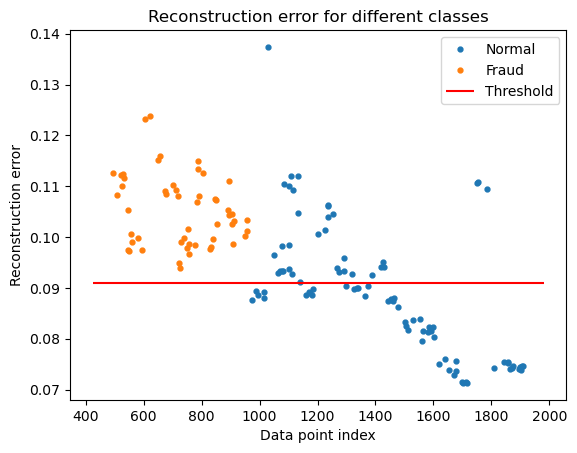

In [62]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 0.091

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

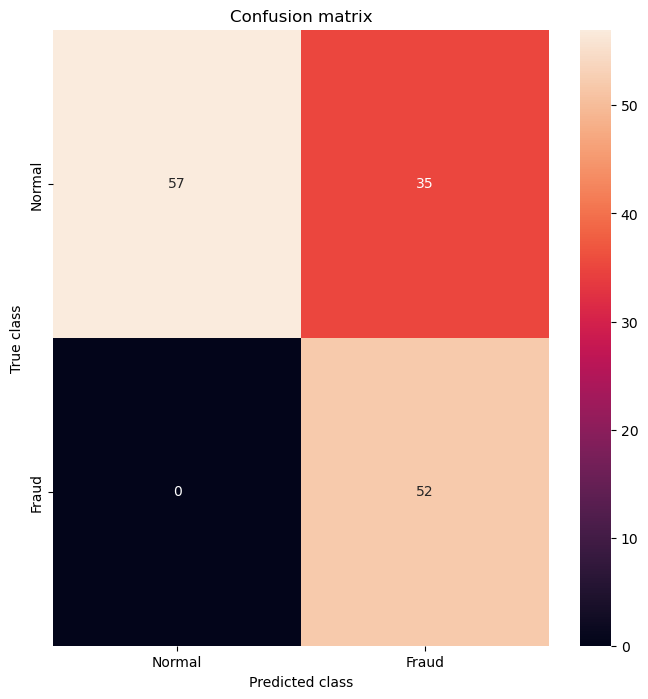

              precision    recall  f1-score   support

           0       1.00      0.62      0.77        92
           1       0.60      1.00      0.75        52

    accuracy                           0.76       144
   macro avg       0.80      0.81      0.76       144
weighted avg       0.85      0.76      0.76       144



In [63]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [0 if e < threshold else 1 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))